In [1]:
from sympy import *
import mpmath
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
init_printing()

In [3]:
theta, epsilon, T, L, l, Dw, Dv, g, a, b, c, m, I, x, y = symbols('theta epsilon T L l D_w D_v g a b c m I x y')

In [138]:
v = sqrt(a**2 + b**2)
phi = atan2(b,a)

u = theta

xdot = a
ydot = b
thetadot= c
adot = 1/m * (-sin(theta + u) * T + sin(phi) * v**2 * Abs(sin(theta - phi) * Dv))
bdot = 1/m * (cos(theta + u)*T - cos(phi) * v**2 * Abs(sin(theta - phi) * Dv)) - g
cdot = 1/I * (sin(u) * T * L - Abs(c)*c * Dw + l*v**2 * sin(theta - phi) * Dv)

In [139]:
pprint(adot)

                   _________                          
                  ╱  2    2                           
-T⋅sin(2⋅θ) + b⋅╲╱  a  + b  ⋅│Dᵥ⋅sin(θ - atan2(b, a))│
──────────────────────────────────────────────────────
                          m                           


In [140]:
pprint(bdot)

                       _________                          
                      ╱  2    2                           
     T⋅cos(2⋅θ) - a⋅╲╱  a  + b  ⋅│Dᵥ⋅sin(θ - atan2(b, a))│
-g + ─────────────────────────────────────────────────────
                               m                          


In [141]:
pprint(cdot)

     ⎛ 2    2⎞                                              
Dᵥ⋅l⋅⎝a  + b ⎠⋅sin(θ - atan2(b, a)) - D_w⋅c⋅│c│ + L⋅T⋅sin(θ)
────────────────────────────────────────────────────────────
                             I                              


In [142]:
adot_corr = 1/m * (-sin(theta + u) * T + sin(phi) * v**2 * (sqrt((sin(theta - phi) * Dv)**2 + epsilon)-sqrt(epsilon)))
bdot_corr = 1/m * (cos(theta + u)*T - cos(phi) * v**2 * (sqrt((sin(theta - phi) * Dv)**2 + epsilon)-sqrt(epsilon))) - g
cdot_corr = 1/I * (sin(u) * T * L - (sqrt(c**2 + epsilon)-sqrt(epsilon))*c * Dw + l*v**2 * sin(theta - phi) * Dv)

In [143]:
pprint(adot_corr)

                   _________ ⎛         _______________________________⎞
                  ╱  2    2  ⎜        ╱   2    2                      ⎟
-T⋅sin(2⋅θ) + b⋅╲╱  a  + b  ⋅⎝-√ε + ╲╱  Dᵥ ⋅sin (θ - atan2(b, a)) + ε ⎠
───────────────────────────────────────────────────────────────────────
                                   m                                   


In [144]:
pprint(bdot_corr)

                       _________ ⎛         _______________________________⎞
                      ╱  2    2  ⎜        ╱   2    2                      ⎟
     T⋅cos(2⋅θ) - a⋅╲╱  a  + b  ⋅⎝-√ε + ╲╱  Dᵥ ⋅sin (θ - atan2(b, a)) + ε ⎠
-g + ──────────────────────────────────────────────────────────────────────
                                       m                                   


In [145]:
pprint(cdot_corr)

                                            ⎛         ________⎞             
     ⎛ 2    2⎞                              ⎜        ╱  2     ⎟             
Dᵥ⋅l⋅⎝a  + b ⎠⋅sin(θ - atan2(b, a)) - D_w⋅c⋅⎝-√ε + ╲╱  c  + ε ⎠ + L⋅T⋅sin(θ)
────────────────────────────────────────────────────────────────────────────
                                     I                                      


In [146]:
# state_vec_abs = Matrix([xdot,ydot,thetadot,adot, bdot, cdot])
# state_vec = Matrix([xdot,ydot,thetadot,adot_corr, bdot_corr, cdot_corr])
state_vec_abs = Matrix([thetadot,adot, bdot, cdot])
state_vec = Matrix([thetadot,adot_corr, bdot_corr, cdot_corr])
pprint(state_vec)
pprint(state_vec_abs)

⎡                                     c                                      ⎤
⎢                                                                            ⎥
⎢                     _________ ⎛         _______________________________⎞   ⎥
⎢                    ╱  2    2  ⎜        ╱   2    2                      ⎟   ⎥
⎢  -T⋅sin(2⋅θ) + b⋅╲╱  a  + b  ⋅⎝-√ε + ╲╱  Dᵥ ⋅sin (θ - atan2(b, a)) + ε ⎠   ⎥
⎢  ───────────────────────────────────────────────────────────────────────   ⎥
⎢                                     m                                      ⎥
⎢                                                                            ⎥
⎢                       _________ ⎛         _______________________________⎞ ⎥
⎢                      ╱  2    2  ⎜        ╱   2    2                      ⎟ ⎥
⎢     T⋅cos(2⋅θ) - a⋅╲╱  a  + b  ⋅⎝-√ε + ╲╱  Dᵥ ⋅sin (θ - atan2(b, a)) + ε ⎠ ⎥
⎢-g + ────────────────────────────────────────────────────────────────────── ⎥
⎢                                       m           

In [147]:
# jac = state_vec.jacobian(Matrix([x, y, theta, a, b, c]))
# jac_abs = state_vec_abs.jacobian(Matrix([x, y, theta, a, b, c]))
jac = state_vec.jacobian(Matrix([theta, a, b, c]))
jac_abs = state_vec_abs.jacobian(Matrix([theta, a, b, c]))

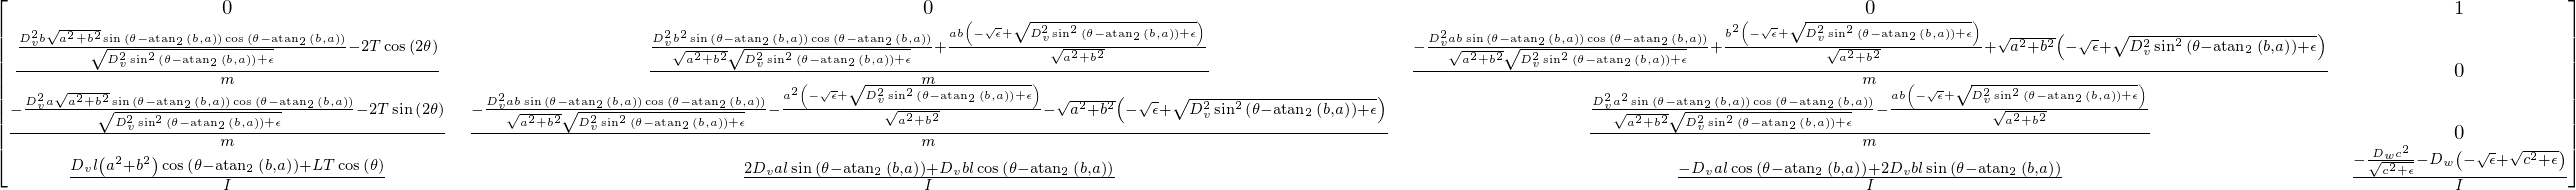

In [148]:
jac

In [149]:
#eval_plus = - Dw * (2*c**2) / (2 * I * Abs(c)) + sqrt((4 * Dv * I * l * v**2 * c **2 * cos(phi - theta) + Dw**2 * (2*c**2)**2)/(2 * I * Abs(c)))
#evals_minus = Dw * (2*c**2) / (2 * I * Abs(c)) - sqrt((4 * Dv * I * l * v**2 * c **2 * cos(phi - theta) + Dw**2 * (2*c**2)**2)/(2 * I * Abs(c)))

#pprint(eval_plus)

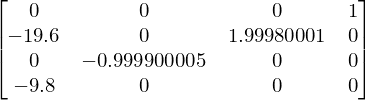

In [162]:
L_real = -1
l_real = 0.
Dv_real = 0.1
Dw_real = 1.
I_real = 1.
m_real = 1.
g_real = 9.8
T_real = 9.8
theta_real = 0.
phi_real = 0.
epsilon_real = 1e-10
a_real = 0.
b_real = 10.
c_real = 0.

jac_subs = jac.subs(L,L_real).subs(l,l_real).subs(Dv, Dv_real).subs(Dw, Dw_real).subs(I, I_real).subs(m,m_real).subs(g,g_real).subs(T, T_real).subs(theta, theta_real).subs(phi,phi_real).subs(epsilon, epsilon_real).subs(a,a_real).subs(b,b_real).subs(c,c_real)
jac_subs

In [163]:
jac_subs_np = np.array(jac_subs,dtype=np.float64)
jac_subs_np

array([[  0.        ,   0.        ,   0.        ,   1.        ],
       [-19.6       ,   0.        ,   1.99980001,   0.        ],
       [  0.        ,  -0.99990001,   0.        ,   0.        ],
       [ -9.8       ,   0.        ,   0.        ,   0.        ]])

In [164]:
[evals, evecs] = np.linalg.eig(jac_subs_np)

In [165]:
np.set_printoptions(linewidth=200, suppress=True)
print(np.real(evals))
print(np.imag(evals),'\n')
print(np.real(evecs))
print(np.imag(evecs))
#[print(vec) for vec in np.real(evecs)]

[-0. -0.  0.  0.]
[ 3.13049517 -3.13049517  1.41407215 -1.41407215] 

[[ 0.          0.         -0.         -0.        ]
 [-0.88507007 -0.88507007  0.81649658  0.81649658]
 [-0.         -0.         -0.         -0.        ]
 [-0.35223982 -0.35223982  0.          0.        ]]
[[ 0.11251888 -0.11251888 -0.          0.        ]
 [ 0.         -0.          0.         -0.        ]
 [-0.28269699  0.28269699  0.57735027 -0.57735027]
 [-0.          0.         -0.          0.        ]]
